# World Happiness Report #

### Group Number #8

Group Members: Kfir Diamond, Lihi Noy, Gal Peleg & Mika Rosenbaum

## About:

picture \
background \
about the columns \
...

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
happy_df = pd.read_csv('World Happiness Report.csv')

import sklearn as sk
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from PIL import Image
from io import BytesIO

In [2]:
happy_df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [3]:
happy_df.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [4]:
happy_df.isnull().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [5]:
happy_df.shape

(2199, 13)

# Searching For Correlations
## Let's investigate expected correlations:
About: the Giant Study...... +link 

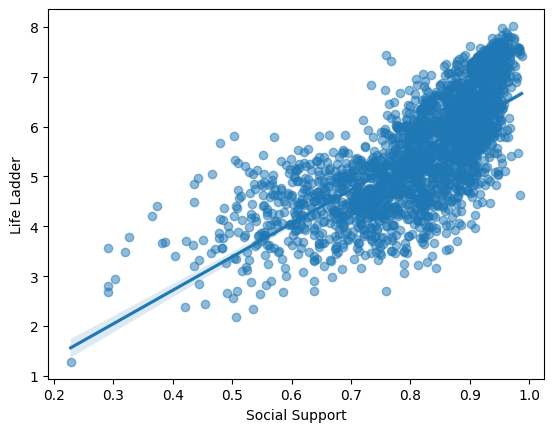

In [6]:
sns.regplot(data=happy_df, x='Social Support', y='Life Ladder', scatter_kws={'alpha': 0.5})
plt.show()

"Money doesn't bring happiness"... does it?

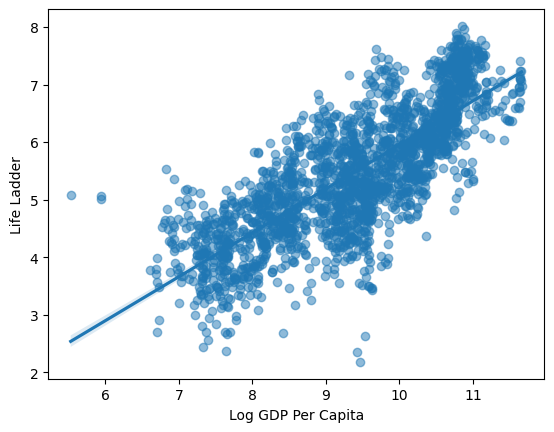

In [7]:
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Life Ladder', scatter_kws={'alpha': 0.5})
plt.show()

We've seen some strong correlations related to the life ladder. \
Now let's check out correlations related to corruptions:

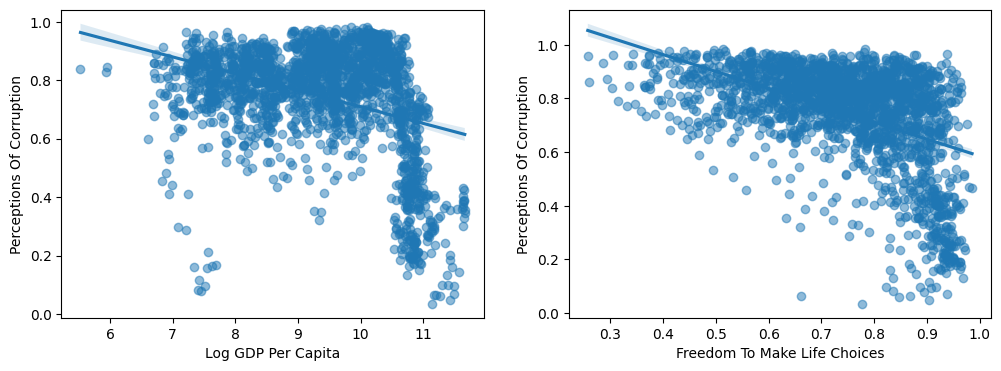

In [8]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Perceptions Of Corruption', scatter_kws={'alpha': 0.5}, ax=ax[0])
sns.regplot(data=happy_df, x='Freedom To Make Life Choices', y='Perceptions Of Corruption', scatter_kws={'alpha': 0.5}, ax=ax[1])
plt.show()

Not as we expected, now we got weak correlations.\
In addition to that, most of the countries seem to be very corrupted. 

# Heatmap
We found two good correlations. Let's look for more, effectively:

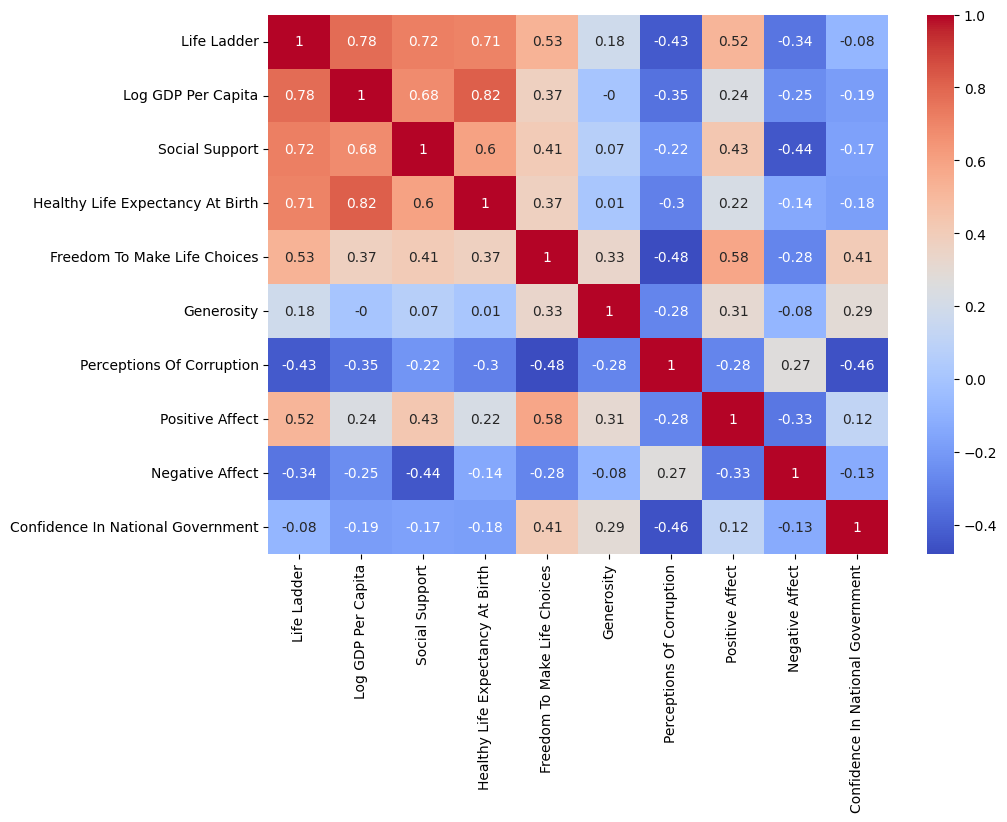

In [9]:
my_cols = ['Life Ladder', 
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']
plt.figure(figsize=(10,7))
my_cor = happy_df[my_cols].corr().round(2)
sns.heatmap(data=my_cor, cmap='coolwarm', annot=True)
plt.show()

# Top 10 
Who are the top 10 happiest countries on average, from 2005? \
What about the most relevant year, 2022? 

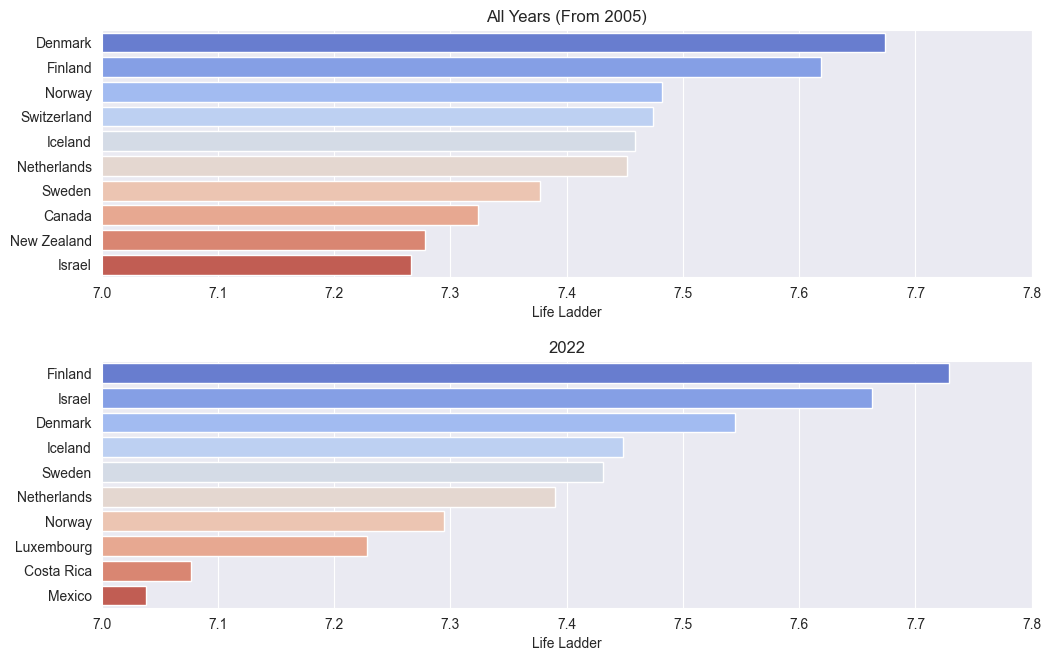

In [24]:
av_df = happy_df.groupby('Country Name')[['Life Ladder']].mean().sort_values('Life Ladder', ascending=False).reset_index()
df_2022 = happy_df[happy_df.Year==2022].sort_values('Life Ladder', ascending=False).reset_index()

fig, ax = plt.subplots(2,1, figsize = (12,7.5))
plt.subplots_adjust(hspace = 0.34)

sns.barplot(data=av_df.head(10), x='Life Ladder', y='Country Name', ax = ax[0], palette='coolwarm')
ax[0].set_xlim(7,7.8)
ax[0].set_title('All Years (From 2005)')
ax[0].set_ylabel("") 

sns.barplot(data=df_2022.head(10), x='Life Ladder', y='Country Name', ax = ax[1], palette='coolwarm')
ax[1].set_xlim(7,7.8)
ax[1].set_title('2022')
ax[1].set_ylabel("") 
plt.show()

Out of 165 different contries, Israel is located at the 10th place on the life ladder. \
Moreover - in the last year of our dataset - Israel is at the second, outstanding place (!) \
Let's check out all the contries we bypassed, using our best correlation - GDP:

In [12]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
canada_df = happy_df[happy_df['Country Name']=='Canada']
new_zealand_df = happy_df[happy_df['Country Name']=='New Zealand']
switzerland_df = happy_df[happy_df['Country Name']=='Switzerland']
denmark_df = happy_df[happy_df['Country Name']=='Denmark']
norway_df = happy_df[happy_df['Country Name']=='Norway']
sweden_df = happy_df[happy_df['Country Name']=='Sweden']
netherlands_df = happy_df[happy_df['Country Name']=='Netherlands']
iceland_df = happy_df[happy_df['Country Name']=='Iceland']

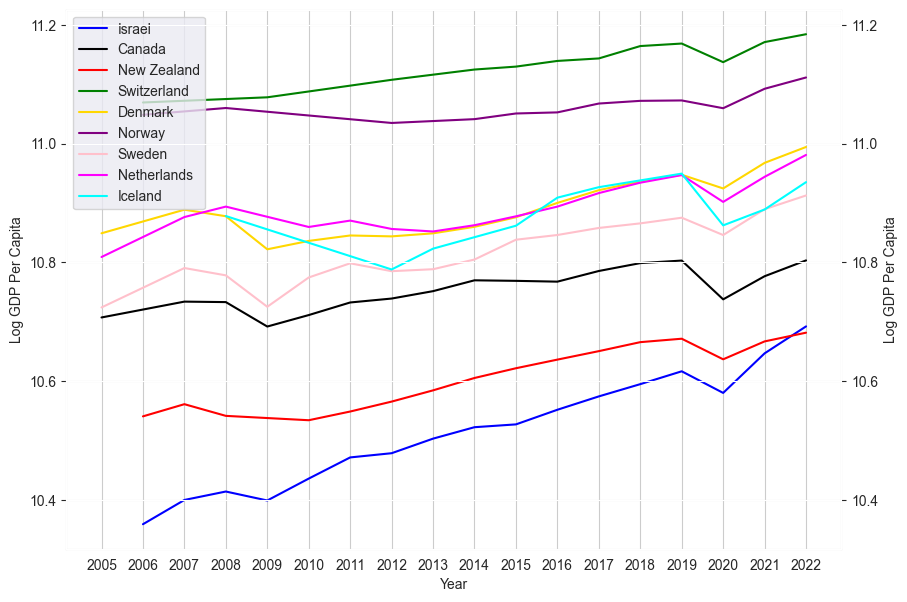

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 7))
sns.set_style("darkgrid")

ax1.plot(israel_df['Year'], israel_df['Log GDP Per Capita'], label='Israel', color='blue')
ax1.plot(canada_df['Year'], canada_df['Log GDP Per Capita'], label='Canada', color='black')
ax1.plot(new_zealand_df['Year'], new_zealand_df['Log GDP Per Capita'], label='New Zealand', color='red')
ax1.plot(switzerland_df['Year'], switzerland_df['Log GDP Per Capita'], label='Switzerland', color='green')
ax1.plot(denmark_df['Year'], denmark_df['Log GDP Per Capita'], label='Denmark', color='gold')
ax1.plot(norway_df['Year'], norway_df['Log GDP Per Capita'], label='Norway', color='purple')
ax1.plot(sweden_df['Year'], sweden_df['Log GDP Per Capita'], label='Sweden', color='pink')
ax1.plot(netherlands_df['Year'], netherlands_df['Log GDP Per Capita'], label='Netherlands', color='magenta')
ax1.plot(iceland_df['Year'], iceland_df['Log GDP Per Capita'], label='Iceland', color='cyan')

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_ylabel('Log GDP Per Capita')
ax2.tick_params(axis='y')

ax1.set_xticks(np.arange(2005, 2023, 1))
ax1.set_xlabel('Year')
ax1.set_ylabel('Log GDP Per Capita')
ax1.legend(loc='upper left')

plt.show()

It can be seen that Israel has the steepest slope. \
Regardless of that, it is interesting to see how in 2020 the Corona virus hit all the countries.

# Our Neighborhood

In [25]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
lebanon_df = happy_df[happy_df['Country Name']=='Lebanon']
syria_df = happy_df[happy_df['Country Name']=='Syria']
jordan_df = happy_df[happy_df['Country Name']=='Jordan']
egypt_df = happy_df[happy_df['Country Name']=='Egypt']

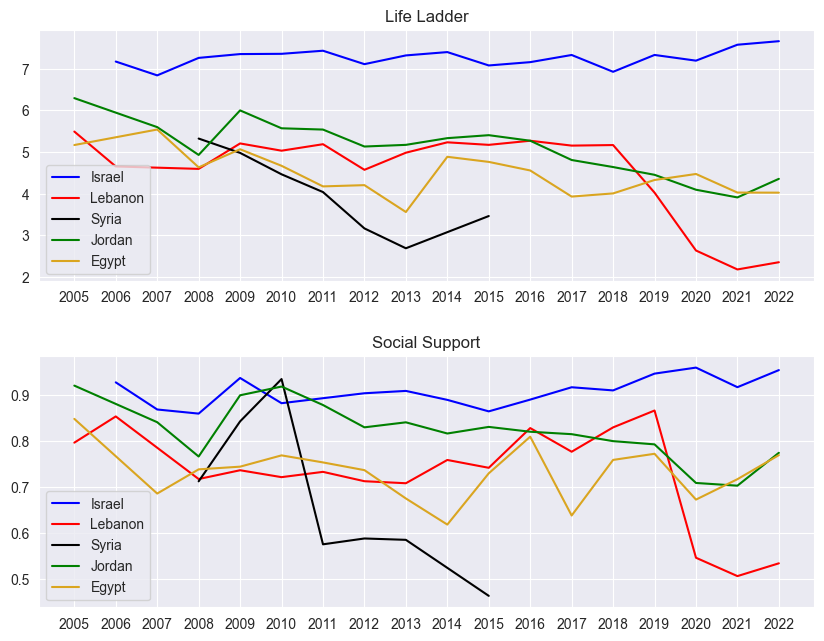

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7.5))
plt.subplots_adjust(hspace=0.3)
sns.set_style("darkgrid")

axes[0].plot(israel_df['Year'], israel_df['Life Ladder'], label='Israel', color='blue')
axes[0].plot(lebanon_df['Year'], lebanon_df['Life Ladder'], label='Lebanon', color='red')
axes[0].plot(syria_df['Year'], syria_df['Life Ladder'], label='Syria', color='black')
axes[0].plot(jordan_df['Year'], jordan_df['Life Ladder'], label='Jordan', color='green')
axes[0].plot(egypt_df['Year'], egypt_df['Life Ladder'], label='Egypt', color='goldenrod')
axes[0].set_xticks(np.arange(2005, 2023, 1))
axes[0].set_title('Life Ladder')
axes[0].legend()

axes[1].plot(israel_df['Year'], israel_df['Social Support'], label='Israel', color='blue')
axes[1].plot(lebanon_df['Year'], lebanon_df['Social Support'], label='Lebanon', color='red')
axes[1].plot(syria_df['Year'], syria_df['Social Support'], label='Syria', color='black')
axes[1].plot(jordan_df['Year'], jordan_df['Social Support'], label='Jordan', color='green')
axes[1].plot(egypt_df['Year'], egypt_df['Social Support'], label='Egypt', color='goldenrod')
axes[1].set_xticks(np.arange(2005, 2023, 1))
axes[1].set_title('Social Support')
axes[1].legend()

plt.show()

The similarity between them both is emphasized. \
We see the overthrow of Syria in 2010. could be because of the start of the civil war. \
In 2022, Lebanon was ranked second worst in the life ladder.

# World Map

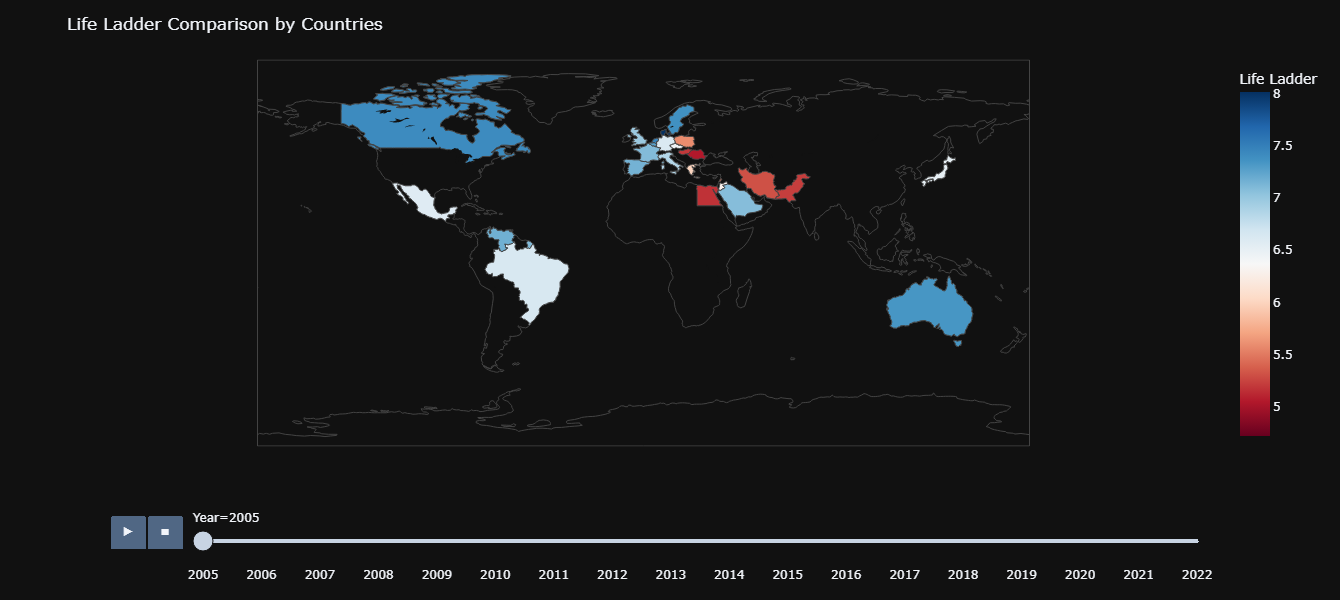

In [19]:
fig = px.choropleth(happy_df.sort_values("Year"), 
                    locations = "Country Name",
                    color = "Life Ladder",
                    locationmode = "country names",
                    template = "plotly_dark",
                     color_continuous_scale= 'RdBu',
                    animation_frame = "Year")
fig.update_layout(title = "Life Ladder Comparison by Countries", height=600, width=800)
fig.show()

Taking a quick look at the world map, we can tell right away that Africa is not having a blast. \
lets investigate it, now focusing on the third strongest correlation - "Healthy Life Expectancy At Birth":

First, what specific Regional Indicator are we looking for? What contries does it contain?

In [20]:
happy_df['Regional Indicator'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [21]:
happy_df[happy_df['Regional Indicator']=='Sub-Saharan Africa']['Country Name'].unique()

array(['Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad',
       'Comoros', 'Congo (Brazzaville)', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Tanzania', 'Togo', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [22]:
happy_df2 = happy_df.copy()
happy_df2 = happy_df2.replace(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Southeast Asia',
       'East Asia'], 'Else')
happy_df2[happy_df2['Country Name']=='Israel']=happy_df2[happy_df2['Country Name']=='Israel'].replace('Else','Israel')
order = ['Sub-Saharan Africa', 'Else', 'Israel']
happy_df2['Regional Indicator'] = pd.Categorical(happy_df2['Regional Indicator'], categories=order, ordered=True)
color_palette = {'Israel': '#CCCCCC', 'Else': 'blue', 'Sub-Saharan Africa': 'red'}

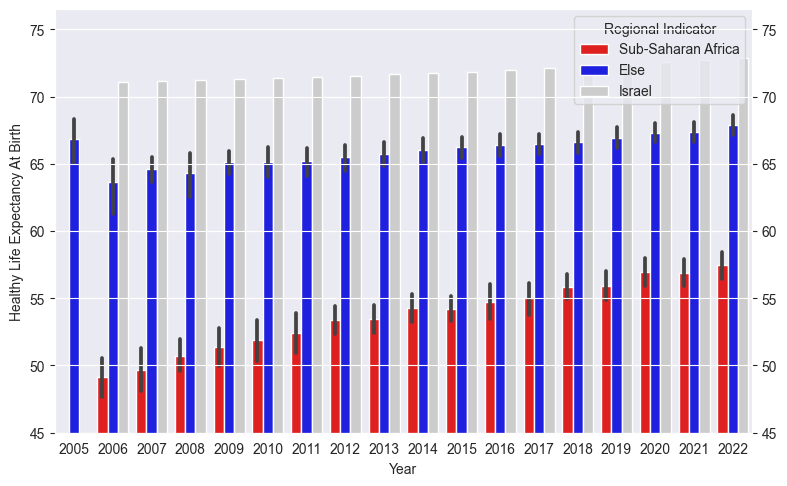

In [23]:
plt.figure(figsize=(9,5.5))
sns.set_style("darkgrid")
ax = sns.barplot(data=happy_df2, x='Year', y='Healthy Life Expectancy At Birth', hue='Regional Indicator', palette=color_palette)
ax.set_ylim(45, ax.get_ylim()[1])
ax2 = ax.twinx()
ax2.set_ylim(45, ax.get_ylim()[1])
ax.yaxis.tick_left()
ax2.yaxis.tick_right()
plt.show()

As expected, Africa's healthy life expectancy at birth is way below the average. \
But despite the difference, it's marked that the continent is going through a huge change: \
In the past twenty years, while the rest of the world's life expectacy stays almost the same, Africa's grows by around 8 years. \
Still, there's a long way to go. \
It can be seen that in 2005 there is a lack of information about Africa and Israel in 2005. Therefore, the '2005' column is unusual because it's unreliable. \
There is no need to expand that our country is again at a remarkable, stable spot in another category. 

# Conclution